### Strategy to Boost Supermarket Sales in January

As the manager of a supermarket in Surabaya, I find myself at a crossroads as we step into January. The new year has just begun, and I am eager to understand how my supermarket has been performing. My office is filled with stacks of transaction data from our customers, brimming with numbers, percentages, and seemingly endless combinations of products. Yet, I feel lost amidst the overwhelming data.

The challenge is clear: I need **insights on what is truly happening in my supermarket**. What are the purchasing patterns of my customers? Which products are flying off the shelves, and which ones are barely noticed? More importantly, **how can I use this information to optimize the layout of the store and boost sales this year**?

In January, **the store layout is the first thing I want to focus on**. Customers are navigating through the aisles, but I want to ensure they’re being guided to the right places. I wonder: Should I place complementary products closer together? Should I create specific zones to attract customers? For instance, should shampoos be next to toothpaste or near body soaps? Should snacks and drinks be closer together to encourage impulse buys?

The only thing I have right now is the [raw transaction data](https://raw.githubusercontent.com/michellechandraa/TutorDataMining/refs/heads/main/Supermarket-December-2017.xlsx). It tells me what customers bought, but I need help deciphering it. **Are there certain product combinations that people frequently buy together?** For example, do people who buy detergents also pick up fabric softeners? Do snacks and beverages have a strong pairing trend?

I need your expertise to dig into this data and uncover patterns. Once we understand what products customers often buy together, I can rearrange the store layout to make it more intuitive and appealing. This way, I can improve the shopping experience for my customers while also increasing the chances of cross-selling and boosting sales.

Let’s uncover the story behind the numbers and make data-driven decisions that will set my supermarket up for success in this new year. Help me turn this chaotic dataset into a clear strategy that drives results!

### Grading

1. Understanding the Data (50 points)


*   Key Metrics (0/10/15/25 points): Identifies useful insights, eg: top-selling products, etc.
*   Seasonal Insights (0/10/15/25 points): Explains trends for January, highlighting any seasonal demands or anomalies in customer behavior.
<br>
<br>

2. Recommending Layout Improvements (50 points)

*   Market Basket Analysis Insights (0/10/15/25 points): Uses association rules to determine logical groupings of products.
*   Placement Ideas (0/10/15/25 points): Provides actionable layout changes idea to increase cross-selling opportunities, such as adjusting the location of high-demand complementary items, eg:
If "Shampoo" is frequently bought with "Soap," they should be placed near each other.




In [21]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
!pip install mlxtend==0.23.1

In [22]:
# load the data set ans show the first five transaction
url = "https://raw.githubusercontent.com/michellechandraa/TutorDataMining/refs/heads/main/Supermarket-December-2017.xlsx"
df = pd.read_excel(url)
df.head()


,KD_SBR,TP_TRN,KDSUP,KAS,TRN_DK,GDG,GGD,KDSLS,KEL,ITEM,...,DEP_SWA,GON,KONS,POST_STOK,STATUS,TP_ADJ,USER,TANGGAL,JAM,LAMA_CRD
0,IN,JUL,NaN,6.0,K,A,AREA,NaN,KERTAS,39390.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:12:02,NaN
1,IN,JUL,NaN,6.0,K,A,AREA,NaN,BTL/DOT,13108.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:24:51,NaN
2,IN,JUL,NaN,6.0,K,A,AREA,NaN,MUSTIKA,5644.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:28:18,NaN
3,IN,JUL,NaN,6.0,K,A,AREA,NaN,SABUN.C,7273.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:28:22,NaN
4,IN,JUL,NaN,6.0,K,A,AREA,NaN,LULURMD,12168.0,...,NaN,NaN,NaN,NaN,NaN,S,MIA,2017-01-02,08:28:20,NaN


## EDA

In [23]:
#2 info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148489 entries, 0 to 148488
Data columns (total 61 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   KD_SBR      148486 non-null  object        
 1   TP_TRN      148486 non-null  object        
 2   KDSUP       40832 non-null   float64       
 3   KAS         136294 non-null  float64       
 4   TRN_DK      148486 non-null  object        
 5   GDG         148486 non-null  object        
 6   GGD         148486 non-null  object        
 7   KDSLS       0 non-null       float64       
 8   KEL         148486 non-null  object        
 9   ITEM        148486 non-null  float64       
 10  NAMA        148486 non-null  object        
 11  BIN         13586 non-null   float64       
 12  KDBIN       0 non-null       float64       
 13  TGL_TRANS   148486 non-null  datetime64[ns]
 14  NO_BKT      148486 non-null  object        
 15  NO_ORD      0 non-null       float64       
 16  ST

In [24]:
#3 check missing values
missing_values = df.isnull().sum()  
missing_values = missing_values.to_frame(name=0)  
missing_values

,0
KD_SBR,3
TP_TRN,3
KDSUP,107657
KAS,12195
TRN_DK,3
...,...
TP_ADJ,9413
USER,3
TANGGAL,3
JAM,3


In [25]:
# Droping un-used Columns
df2 = df.drop(columns=[
    'KDSUP', 'TRN_DK', 'GDG', 'GGD', 'KDSLS', 'BIN', 'KDBIN', 
    'NO_ORD', 'SLD_AK', 'SLD_AKG', 'HRG_OLD', 'HRGBL_OLD', 
    'DISC1', 'DISC2', 'JLH_DIS', 'JLH_DIS1', 'JLH_DIS2', 'HRGJL_OLD', 
    'HRGJL1_OLD', 'HRGJL2_OLD', 'SUPP_OLD', 'DISB1_OLD', 'DISB2_OLD', 
    'PPN_OLD', 'PPNBM', 'PPNBM_OLD', 'PTS_GDG', 'PTS_KEL', 'PTS_ITEM', 
    'QTY_PTS', 'TRNBL', 'POST', 'TGL_OLD', 'FILLER', 'SUPPLIER', 
    'DEP_SWA', 'GON', 'KONS', 'POST_STOK', 'STATUS', 'TP_ADJ', 'USER', 
    'TANGGAL', 'JAM', 'LAMA_CRD'
])

In [26]:
df2.head()

,KD_SBR,TP_TRN,KAS,KEL,ITEM,NAMA,TGL_TRANS,NO_BKT,STS_BYR,QTY,HRG_PKK,HRG_JUL,DISC,PPN,JLH_TRANS,KET_TRANS
0,IN,JUL,6.0,KERTAS,39390.0,KERTAS KADO SINAR DU,2017-01-02,060102001,CD,2.0,549.98,1100.0,0.0,0.0,2200.0,CASH DISCOUNT
1,IN,JUL,6.0,BTL/DOT,13108.0,PIGEON BTL PP RP 240,2017-01-02,060102002,CD,1.0,20640.45,23000.0,0.0,0.0,23000.0,CASH DISCOUNT
2,IN,JUL,6.0,MUSTIKA,5644.0,MR SEKAR TANJUNG KB,2017-01-02,060102003,CD,1.0,8720.00,9500.0,0.0,0.0,9500.0,CASH DISCOUNT
3,IN,JUL,6.0,SABUN.C,7273.0,BIORE BF 100ML WHITE,2017-01-02,060102003,CD,1.0,6215.00,6900.0,0.0,0.0,6900.0,CASH DISCOUNT
4,IN,JUL,6.0,LULURMD,12168.0,OVALE LULUR BALI BEN,2017-01-02,060102003,CD,1.0,12119.65,13500.0,0.0,0.0,13500.0,CASH DISCOUNT


In [27]:
df3 = df2.dropna()
df3.isnull().sum()

KD_SBR       0
TP_TRN       0
KAS          0
KEL          0
ITEM         0
NAMA         0
TGL_TRANS    0
NO_BKT       0
STS_BYR      0
QTY          0
HRG_PKK      0
HRG_JUL      0
DISC         0
PPN          0
JLH_TRANS    0
KET_TRANS    0
dtype: int64

C:\Users\HP\AppData\Local\Temp\ipykernel_9368\4072531699.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["TGL_TRANS"] = pd.to_datetime(df3["TGL_TRANS"], format = "%d-%m-%Y")
C:\Users\HP\AppData\Local\Temp\ipykernel_9368\4072531699.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['TGL_TRANS'] = pd.to_datetime(df3['TGL_TRANS']).dt.date


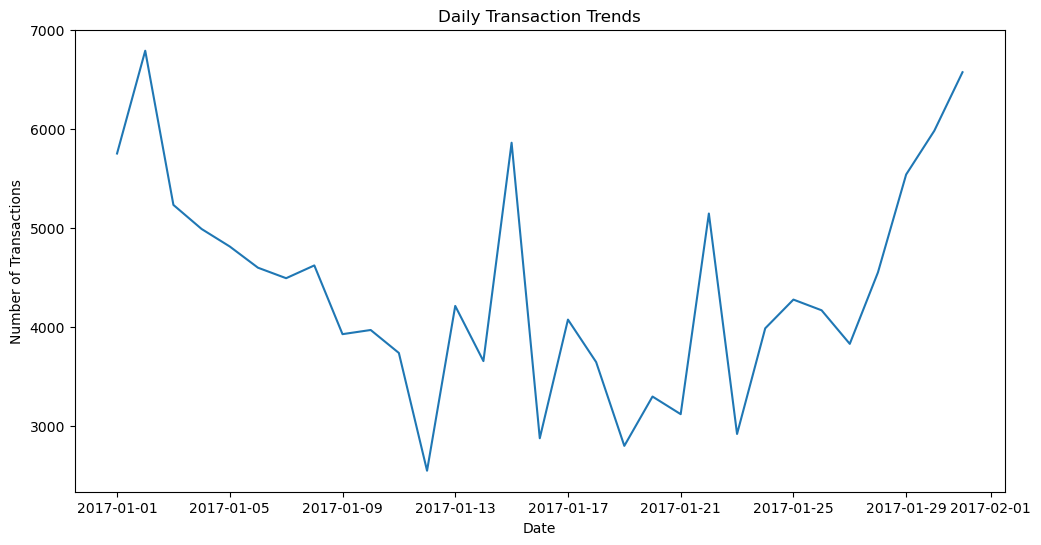

In [28]:
from matplotlib import pyplot as plt
df3["TGL_TRANS"] = pd.to_datetime(df3["TGL_TRANS"], format = "%d-%m-%Y")
df3['TGL_TRANS'] = pd.to_datetime(df3['TGL_TRANS']).dt.date

daily_transactions = df3.groupby('TGL_TRANS')['NO_BKT'].count().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(daily_transactions['TGL_TRANS'], daily_transactions['NO_BKT'])
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.title('Daily Transaction Trends')
plt.show()

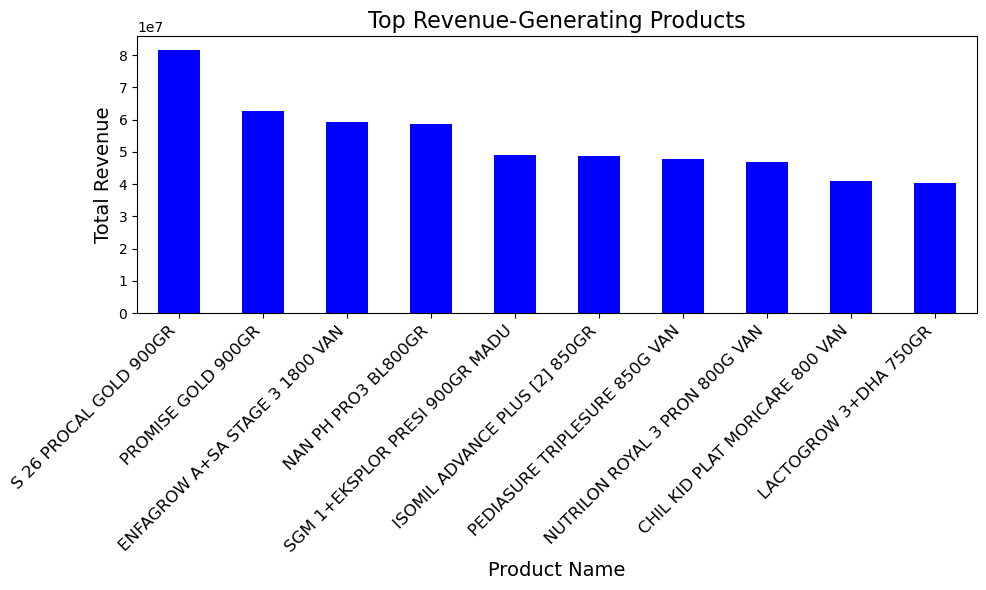

In [30]:
# Top Revenue-Generating Products
plt.figure(figsize=(10, 6))
top_revenue_products.plot(kind='bar', color='blue')  # Ganti warna menjadi biru
plt.title('Top Revenue-Generating Products', fontsize=16)
plt.xlabel('Product Name', fontsize=14)
plt.ylabel('Total Revenue', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()

In [36]:
# Convert 'TGL_TRANS' column to datetime if it is not already
df['TGL_TRANS'] = pd.to_datetime(df['TGL_TRANS'], errors='coerce')

# Now, extract the day of the week
df['Days'] = df['TGL_TRANS'].dt.day_name()

# Group by 'Days' and sum up transactions for each day
daily_transactions_count = df.groupby('Days').size().reset_index(name='Transaction_Count')

# Ensure 'Days' is ordered (Monday to Sunday)
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_transactions_count['Days'] = pd.Categorical(daily_transactions_count['Days'], categories=day_order, ordered=True)

# Sort by the correct day order
daily_transactions_count = daily_transactions_count.sort_values('Days')

# Display the result
print(daily_transactions_count)

        Days  Transaction_Count
1     Monday              24061
5    Tuesday              26908
6  Wednesday              19493
4   Thursday              15633
0     Friday              18469
2   Saturday              16902
3     Sunday              27020


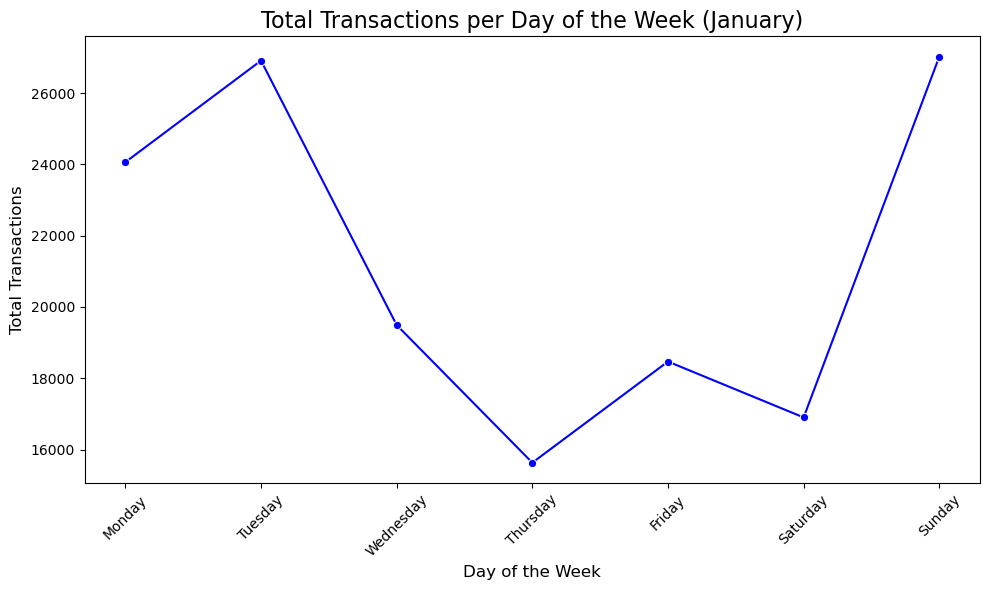

In [37]:
import seaborn as sns

# Plotting dengan Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='Days', y='Transaction_Count', data=daily_transactions_count, marker='o', color='blue')

# Menambahkan label dan judul
plt.title('Total Transactions per Day of the Week (January)', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Total Transactions', fontsize=12)
plt.xticks(rotation=45)  # Memutar label hari untuk keterbacaan lebih baik

# Menampilkan plot
plt.tight_layout()
plt.show()


In [39]:
# Create a pivot table representing transactions, with each row as a transaction and columns as products,
# filling in zeros where a product is not present in a transaction
basket = df3.groupby(['NO_BKT', 'KEL'])['KEL'].count().unstack().reset_index().fillna(0).set_index('NO_BKT')
basket.head()

KEL,A BABY,A JAHIT,A TULIS,A.AGAR,A.DAPUR,ABON,ACNES,AGENDA,AIR.M,AKANTOR,...,VAPE,VIVA,WAFER,WAFER.P,WAFERKL,WALLS,WARDAH,WONDERL,WRP LW,ZWITSAL
NO_BKT,,,,,,,,,,,,,,,,,,,,,
010101001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
010101002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
010101003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
010101004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
010101005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0


In [40]:
# Step 1: Create a pivot table to represent transactions, filling in zeros for missing values
basket = df3.pivot_table(index='NO_BKT', columns='KEL', aggfunc='size', fill_value=0)

# Step 2: Transform the matrix to binary by converting values greater than 1 to 1
basket[basket > 1] = 1

# Step 3: Display the first few rows of the transformed pivot table
basket.head()

KEL,A BABY,A JAHIT,A TULIS,A.AGAR,A.DAPUR,ABON,ACNES,AGENDA,AIR.M,AKANTOR,...,VAPE,VIVA,WAFER,WAFER.P,WAFERKL,WALLS,WARDAH,WONDERL,WRP LW,ZWITSAL
NO_BKT,,,,,,,,,,,,,,,,,,,,,
010101001,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
010101002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
010101003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
010101004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
010101005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [41]:
# Step 1: Apply the Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(basket, min_support=0.02, use_colnames=True)

# Step 2: Display the frequent itemsets along with their support values
print("Frequent Itemsets:")
print(frequent_itemsets.head(35))

c:\Users\HP\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Frequent Itemsets:
     support   itemsets
0   0.038587    (AIR.M)
1   0.032868  (ASESORS)
2   0.033576  (B DAPUR)
3   0.063953  (BISCPAK)
4   0.024262  (BTL/DOT)
5   0.032727   (COKLAT)
6   0.027008  (DDORANT)
7   0.085327  (DETERJN)
8   0.029075     (GULA)
9   0.021204      (HBL)
10  0.022903  (INSECTA)
11  0.020865    (KAPAS)
12  0.045155     (KOPI)
13  0.030065  (KOSMETC)
14  0.032415  (M.GOSOK)
15  0.022761  (MCEREAL)
16  0.080373      (MIE)
17  0.091923  (MINUMAN)
18  0.043145   (MINYAK)
19  0.026923     (OBAT)
20  0.029811  (OBATPEL)
21  0.077626   (P GIGI)
22  0.142287  (PAMPERS)
23  0.047476   (PERMEN)
24  0.045664  (PMBALUT)
25  0.032132    (ROKOK)
26  0.028763   (ROTI.B)
27  0.036747  (SABUN.C)
28  0.089234  (SABUN.M)
29  0.033916  (SABUNCP)
30  0.083232  (SHAMPOO)
31  0.030773  (SIKAT G)
32  0.068794    (SNACK)
33  0.043711  (SOFTENR)
34  0.058659     (SUSU)


The table illustrates the **support** values of various products, reflecting how often they are purchased together in transactions. Below is a summary of the findings:

- **High support**: Products such as **Pampers (0.14)**, **MINUMAN (beverages, 0.09)**, and **SABUN.M (soap, 0.09)** are frequently purchased and constitute a significant portion of shopping carts.
- **Moderate support**: Items like **DETERJN (detergent, 0.06)** and **KOPI (coffee, 0.04)** are also regularly bought but at a lower frequency compared to the top products.
- **Low support**: Products such as **ROTI.B (bread, 0.03)** and **ROKOK (cigarettes, 0.03)** are less commonly purchased, suggesting they cater to specific markets or are bought less often.

### Business Recommendations Based on Support Values and Association Rules:

1. **Prioritize high-support products**: Focus marketing efforts on popular products like Pampers, MINUMAN (beverages), and SABUN.M (soap). Promotions, discounts, and loyalty programs featuring these items could enhance customer engagement and boost sales.

2. **Leverage cross-selling**: Moderate to high-support products, including DETERJN (detergent), KOPI (coffee), and SABUN.C (soap), often appear in combination. Consider bundling related items—such as coffee with snacks or detergent with fabric softener—to encourage customers to purchase complementary products.

3. **Seasonal promotions**: High-support items such as PAMPERS, SABUN.M, and MIE (instant noodles) are ideal candidates for holiday or event-driven promotions. Special sales or discounts during peak shopping periods could further drive demand.

4. **Niche marketing for low-support products**: For items with low support like ROTI.B (bread) and ROKOK (cigarettes), implement targeted campaigns aimed at specific customer groups. For instance, bread could be marketed to families, while cigarettes might appeal to regular smokers through focused advertising.

5. **Optimize inventory management**: Ensure products with high support, such as Pampers and MINUMAN, are always well-stocked and prominently displayed to attract customers. Manage low-support items with a just-in-time approach or consider promotional strategies to clear excess inventory.

6. **Enhance loyalty programs**: Build customer loyalty by introducing reward programs for frequently purchased products like SABUN.M. This strategy could encourage repeat purchases and strengthen customer relationships.

By analyzing purchase frequency and product associations, businesses can refine marketing strategies, improve stock management, and enhance customer satisfaction to drive overall performance.